In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Read the data from a CSV file
data = pd.read_csv('./spotify-2023.csv')

# Display the first few rows of the dataframe
print("Initial Data:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop rows with missing values
cleaned_data = data.dropna()

# Display the first few rows of the cleaned dataframe
print("\nCleaned Data:")
print(cleaned_data.head())

# Summary statistics of the cleaned data
print("\nSummary Statistics:")
print(cleaned_data.describe())

Initial Data:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

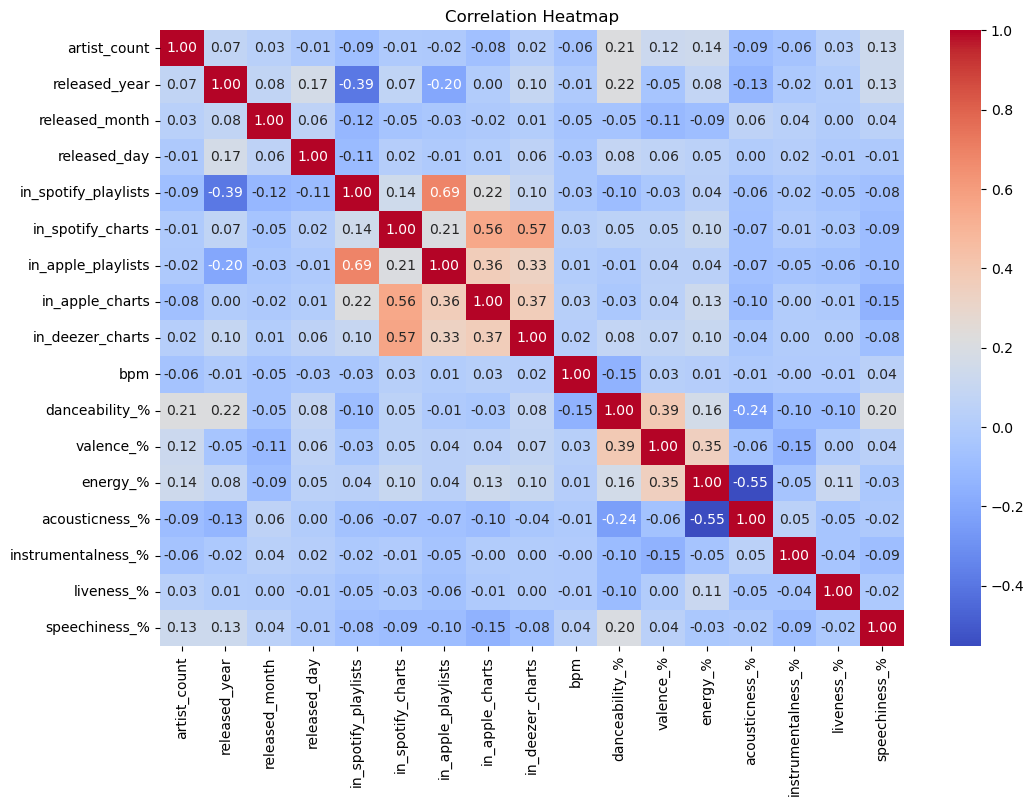

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = cleaned_data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                 .stack()
                 .sort_values(ascending=False).head(10))

in_spotify_playlists  in_apple_playlists    0.688316
in_spotify_charts     in_deezer_charts      0.566161
                      in_apple_charts       0.556804
danceability_%        valence_%             0.389729
in_apple_charts       in_deezer_charts      0.366581
in_apple_playlists    in_apple_charts       0.364761
valence_%             energy_%              0.349736
in_apple_playlists    in_deezer_charts      0.326815
in_spotify_playlists  in_apple_charts       0.215676
released_year         danceability_%        0.215032
dtype: float64

In [11]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                 .stack()
                 .sort_values(ascending=False).tail(10))

released_month   valence_%              -0.110355
                 in_spotify_playlists   -0.122407
released_year    acousticness_%         -0.133224
in_apple_charts  speechiness_%          -0.146472
valence_%        instrumentalness_%     -0.147032
bpm              danceability_%         -0.148174
released_year    in_apple_playlists     -0.201474
danceability_%   acousticness_%         -0.240454
released_year    in_spotify_playlists   -0.390729
energy_%         acousticness_%         -0.552637
dtype: float64

In [14]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(10)
inv_sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).tail(10)[::-1]

# Adjust display options to avoid truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the sorted pairs
print(sorted_pairs)

in_apple_playlists  in_spotify_playlists    0.708277
in_deezer_charts    in_spotify_charts       0.600205
in_apple_charts     in_spotify_charts       0.552232
                    in_apple_playlists      0.414523
valence_%           danceability_%          0.408451
in_deezer_charts    in_apple_charts         0.383668
                    in_apple_playlists      0.369032
energy_%            valence_%               0.357612
in_apple_charts     in_spotify_playlists    0.271317
in_apple_playlists  in_spotify_charts       0.233354
dtype: float64


[('acousticness_%', 'energy_%'), ('in_spotify_playlists', 'released_year'), ('acousticness_%', 'danceability_%'), ('in_apple_playlists', 'released_year'), ('speechiness_%', 'in_apple_charts'), ('danceability_%', 'bpm'), ('instrumentalness_%', 'valence_%'), ('acousticness_%', 'released_year'), ('valence_%', 'released_month'), ('speechiness_%', 'in_apple_playlists')]
Regression analysis for acousticness_% and energy_%:
                            OLS Regression Results                            
Dep. Variable:               energy_%   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     358.4
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.61e-66
Time:                        18:35:58   Log-Likelihood:                -3280.6
No. Observations:                 817   AIC:                             6565.
Df Residuals:             

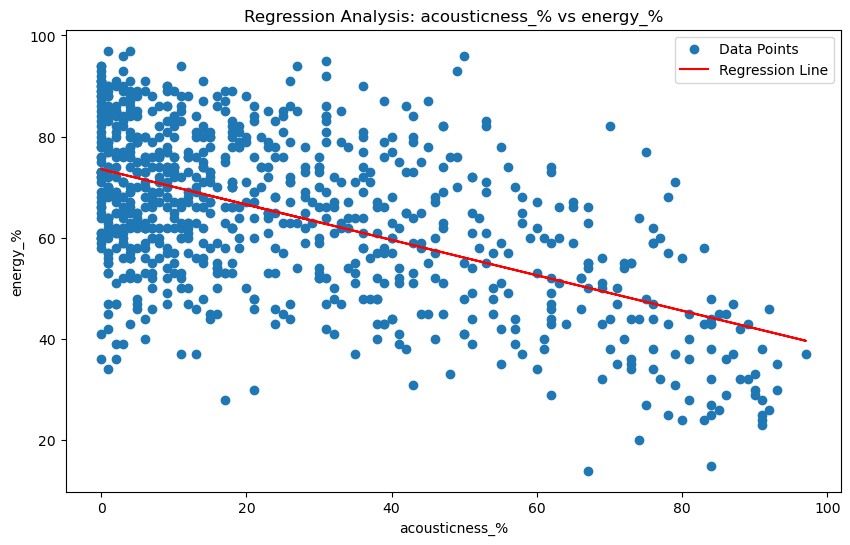

Regression analysis for in_spotify_playlists and released_year:
                            OLS Regression Results                            
Dep. Variable:          released_year   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     146.8
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           3.41e-31
Time:                        18:35:58   Log-Likelihood:                -3037.4
No. Observations:                 817   AIC:                             6079.
Df Residuals:                     815   BIC:                             6088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

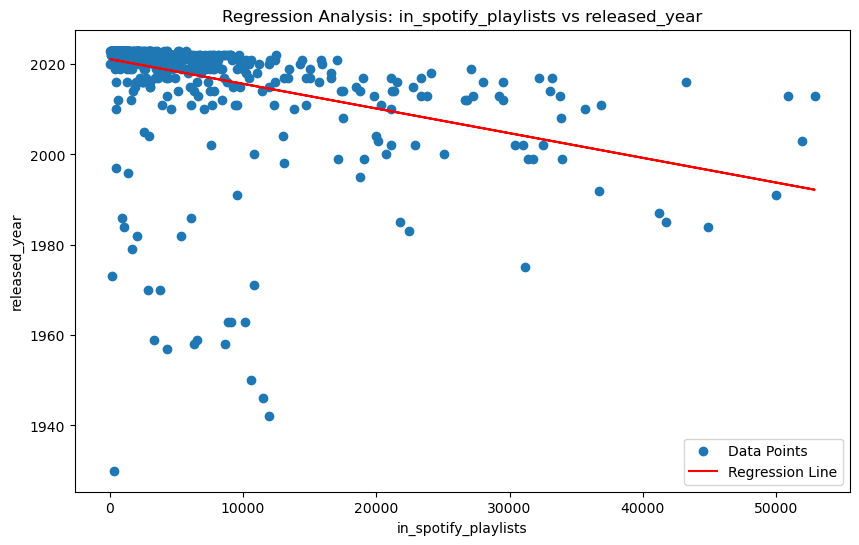

Regression analysis for acousticness_% and danceability_%:
                            OLS Regression Results                            
Dep. Variable:         danceability_%   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     50.01
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           3.29e-12
Time:                        18:35:59   Log-Likelihood:                -3329.8
No. Observations:                 817   AIC:                             6664.
Df Residuals:                     815   BIC:                             6673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

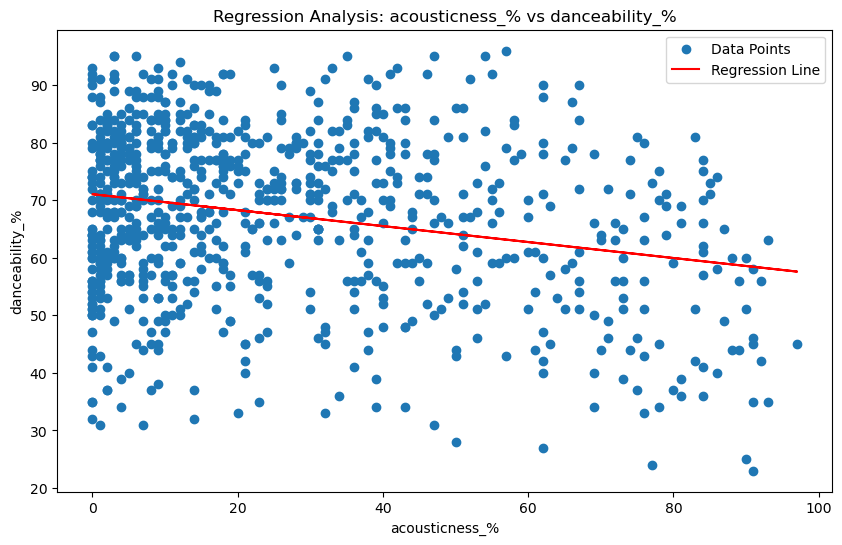

Regression analysis for in_apple_playlists and released_year:
                            OLS Regression Results                            
Dep. Variable:          released_year   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     34.48
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           6.26e-09
Time:                        18:35:59   Log-Likelihood:                -3088.1
No. Observations:                 817   AIC:                             6180.
Df Residuals:                     815   BIC:                             6190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

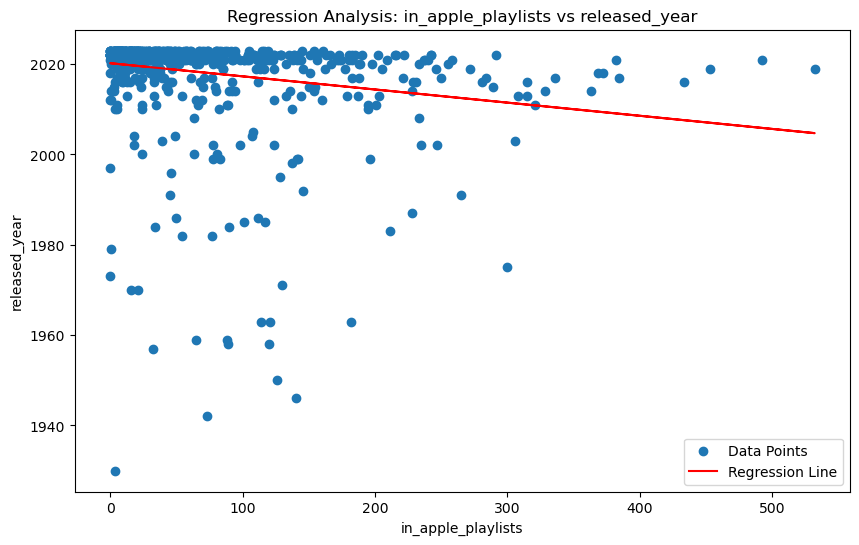

Regression analysis for speechiness_% and in_apple_charts:
                            OLS Regression Results                            
Dep. Variable:        in_apple_charts   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     17.87
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.63e-05
Time:                        18:35:59   Log-Likelihood:                -4339.0
No. Observations:                 817   AIC:                             8682.
Df Residuals:                     815   BIC:                             8691.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

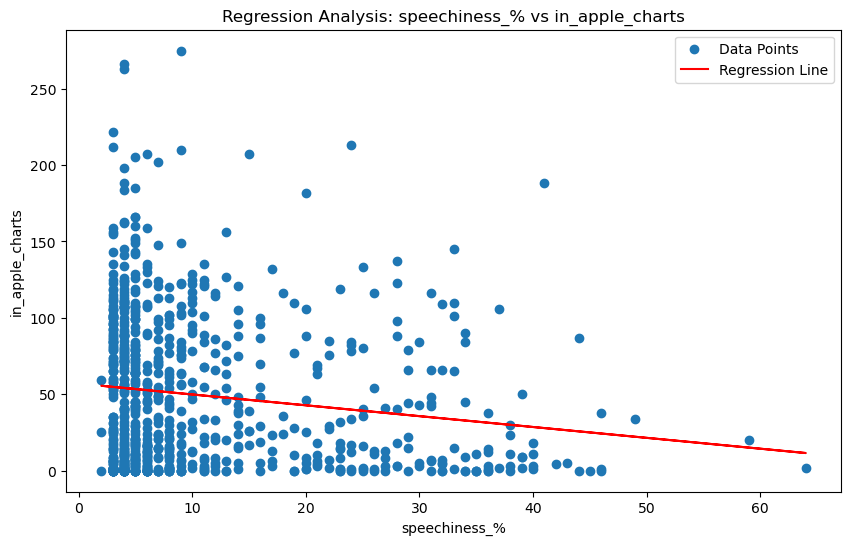

Regression analysis for danceability_% and bpm:
                            OLS Regression Results                            
Dep. Variable:                    bpm   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     18.30
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.12e-05
Time:                        18:35:59   Log-Likelihood:                -3877.2
No. Observations:                 817   AIC:                             7758.
Df Residuals:                     815   BIC:                             7768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

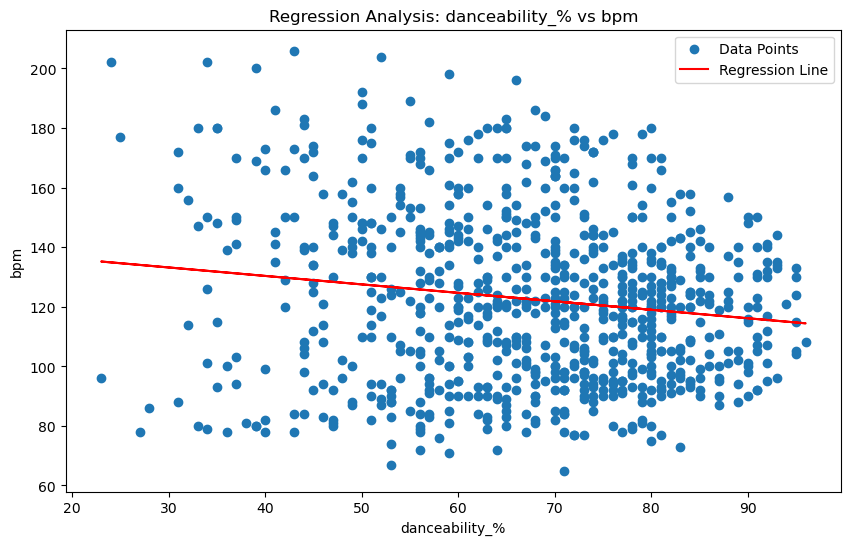

Regression analysis for instrumentalness_% and valence_%:
                            OLS Regression Results                            
Dep. Variable:              valence_%   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     18.01
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.45e-05
Time:                        18:35:59   Log-Likelihood:                -3733.3
No. Observations:                 817   AIC:                             7471.
Df Residuals:                     815   BIC:                             7480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

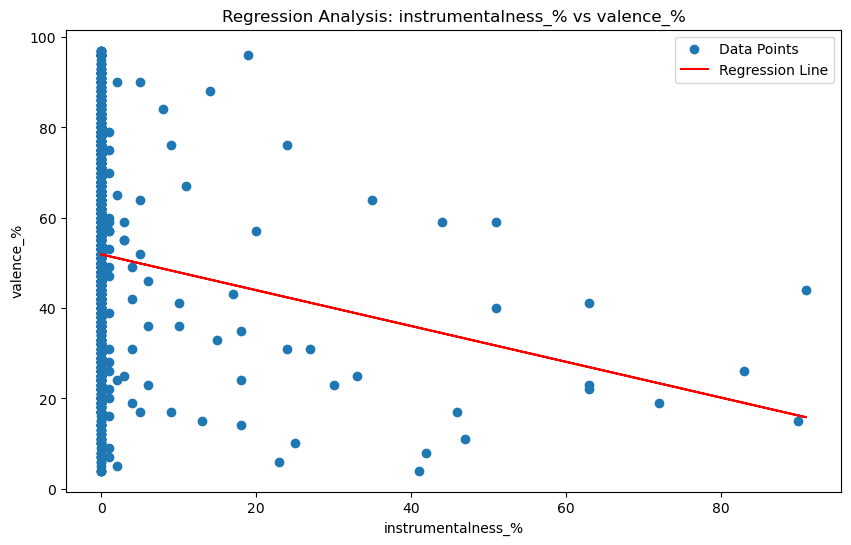

Regression analysis for acousticness_% and released_year:
                            OLS Regression Results                            
Dep. Variable:          released_year   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     14.73
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           0.000134
Time:                        18:35:59   Log-Likelihood:                -3097.8
No. Observations:                 817   AIC:                             6200.
Df Residuals:                     815   BIC:                             6209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

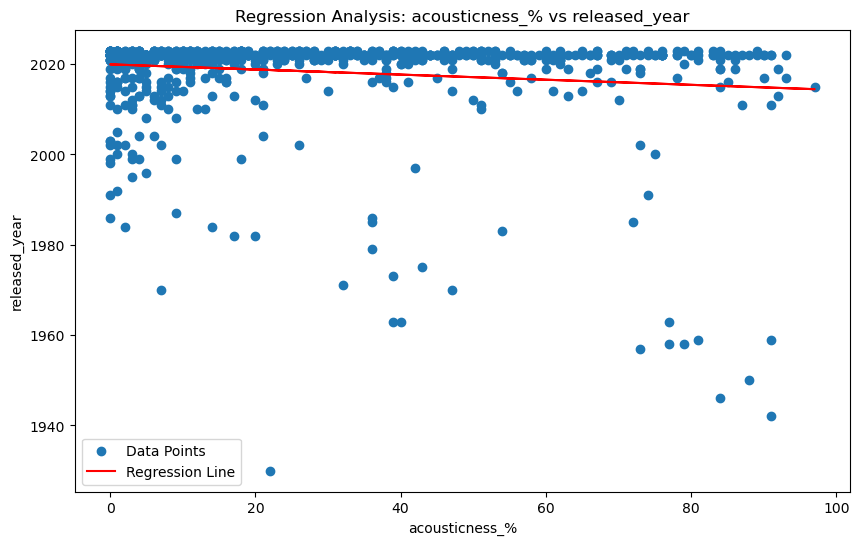

Regression analysis for valence_% and released_month:
                            OLS Regression Results                            
Dep. Variable:         released_month   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     10.05
Date:                Thu, 05 Dec 2024   Prob (F-statistic):            0.00158
Time:                        18:35:59   Log-Likelihood:                -2194.0
No. Observations:                 817   AIC:                             4392.
Df Residuals:                     815   BIC:                             4401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

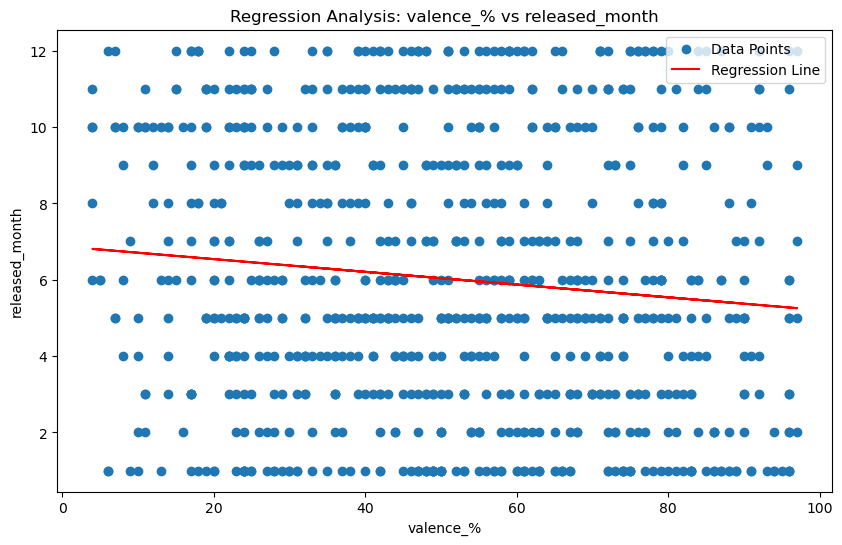

Regression analysis for speechiness_% and in_apple_playlists:
                            OLS Regression Results                            
Dep. Variable:     in_apple_playlists   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.846
Date:                Thu, 05 Dec 2024   Prob (F-statistic):            0.00521
Time:                        18:35:59   Log-Likelihood:                -4681.4
No. Observations:                 817   AIC:                             9367.
Df Residuals:                     815   BIC:                             9376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

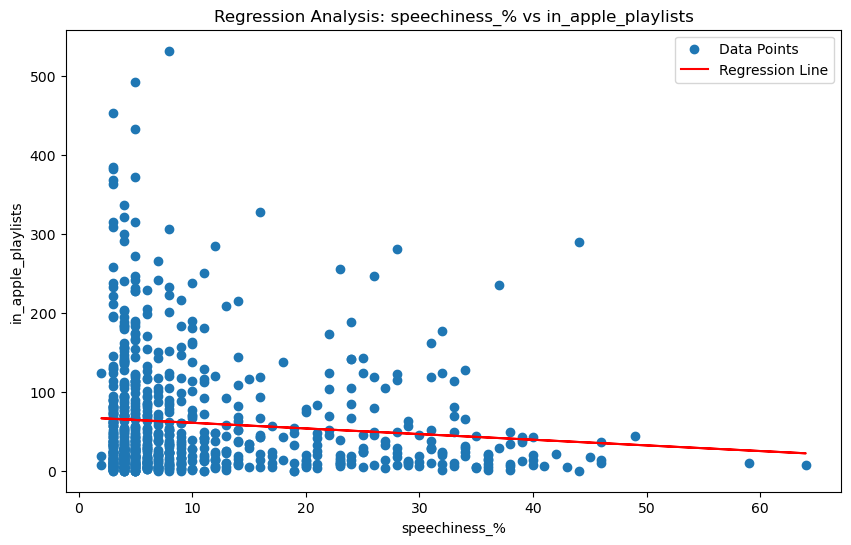

In [15]:
# Perform regression analysis on the best pairs

to_analyze = []
# to_analyze.extend(sorted_pairs.index)
to_analyze.extend(inv_sorted_pairs.index)

print(to_analyze)

for (var1, var2) in to_analyze:
    X = cleaned_data[[var1]]
    y = cleaned_data[var2]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    print(f"Regression analysis for {var1} and {var2}:")
    print(model.summary())
    print()

    # Plot the regression line and data points
    plt.figure(figsize=(10, 6))
    plt.scatter(cleaned_data[var1], cleaned_data[var2], label='Data Points')
    plt.plot(cleaned_data[var1], model.predict(X), color='red', label='Regression Line')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Regression Analysis: {var1} vs {var2}')
    plt.legend()
    plt.show()